In [1]:
#Stock Price Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf

# Download Tesla stock data
data = yf.download('TSLA', start='2010-01-01', end='2023-01-01')
data.to_csv('tesla_stock_data.csv')


[*********************100%%**********************]  1 of 1 completed


In [5]:
data=pd.read_csv(r"C:\Users\asus\Downloads\tesla-stock-price.csv")

In [6]:
data

,date,close,volume,open,high,low
0,11:34,270.49,"4,787,699",264.50,273.8800,262.2400
1,2018/10/15,259.59,6189026.0000,259.06,263.2800,254.5367
2,2018/10/12,258.78,7189257.0000,261.00,261.9900,252.0100
3,2018/10/11,252.23,8128184.0000,257.53,262.2500,249.0300
4,2018/10/10,256.88,12781560.0000,264.61,265.5100,247.7700
...,...,...,...,...,...,...
752,2015/10/21,210.09,4177956.0000,211.99,214.8100,208.8000
753,2015/10/20,213.03,14877020.0000,227.72,228.6000,202.0000
754,2015/10/19,228.10,2506836.0000,226.50,231.1500,224.9400
755,2015/10/16,227.01,4327574.0000,223.04,230.4805,222.8700


In [7]:
data.head(10)

,date,close,volume,open,high,low
0,11:34,270.49,"4,787,699",264.50,273.8800,262.2400
1,2018/10/15,259.59,6189026.0000,259.06,263.2800,254.5367
2,2018/10/12,258.78,7189257.0000,261.00,261.9900,252.0100
3,2018/10/11,252.23,8128184.0000,257.53,262.2500,249.0300
4,2018/10/10,256.88,12781560.0000,264.61,265.5100,247.7700
5,2018/10/09,262.80,12037780.0000,255.25,266.7700,253.3000
6,2018/10/08,250.56,13371180.0000,264.52,267.7599,249.0000
7,2018/10/05,261.95,17900710.0000,274.65,274.8800,260.0000
8,2018/10/04,281.83,9638885.0000,293.95,294.0000,277.6700
9,2018/10/03,294.80,7982272.0000,303.33,304.6000,291.5700


In [8]:
data.describe()

,close,open,high,low
count,757.000000,757.000000,757.000000,757.000000
mean,272.645614,272.760659,277.122776,268.017399
std,58.378585,58.449827,59.194761,57.515736
min,143.670000,142.320000,154.970000,141.050000
25%,219.560000,219.640000,222.569000,216.080000
50%,277.450000,277.625000,280.789900,273.550000
75%,322.690000,321.560000,327.120000,316.560100
max,385.000000,386.690000,389.610000,379.345000


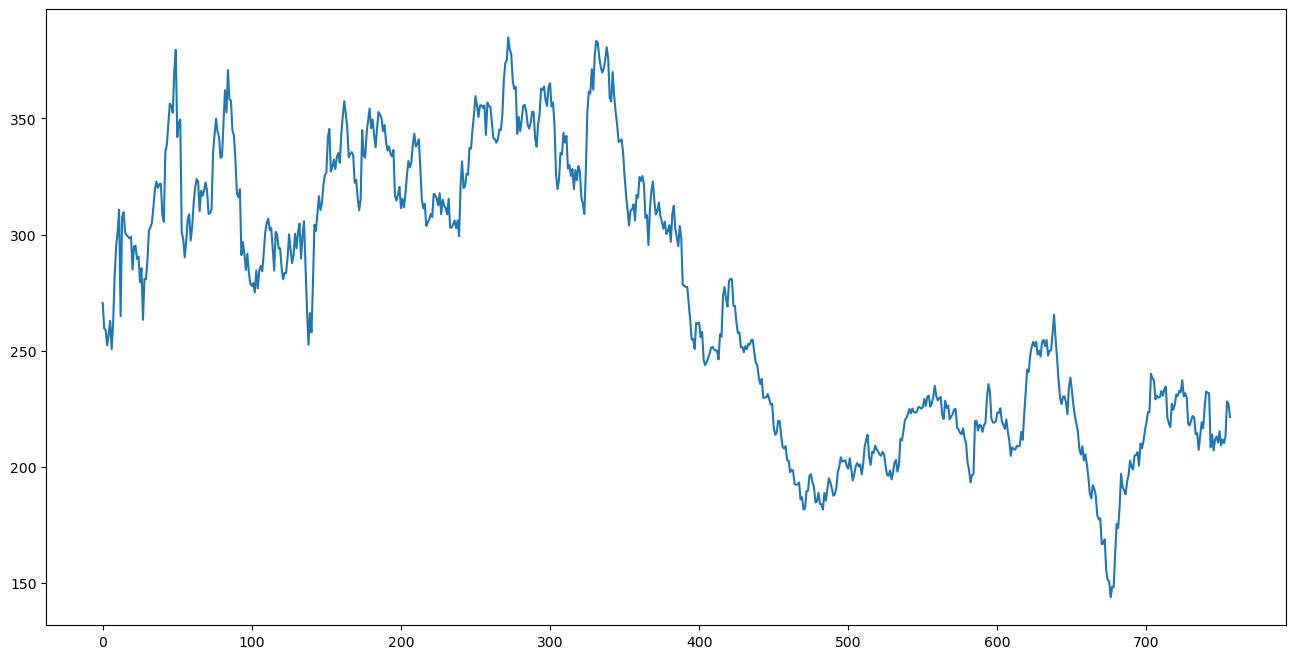

In [9]:
plt.figure(figsize=(16,8))
plt.plot(data['close'],label='Closing Price')

In [10]:
data['open-close']=data['open']-data['close']
data['high-low']=data['high']-data['low']
data=data.dropna()

In [11]:
'''A positive value in this column indicates that the stock opened higher than it closed, meaning the price decreased during the trading day.
A negative value indicates that the stock closed higher than it opened, meaning the price increased during the trading day.
indicating the volatility or price fluctuation within that trading day.
A larger value suggests higher volatility, meaning the stock had a wider range of price movement.
A smaller value suggests lower volatility, meaning the stock had a more stable price range'''
x=data[['open-close','high-low']]
x.head()

,open-close,high-low
0,-5.99,11.6400
1,-0.53,8.7433
2,2.22,9.9800
3,5.30,13.2200
4,7.73,17.7400


In [12]:
'''row now contains the closing price of the next trading day.This is a comparison operation.
It checks whether the next day’s closing price is greater than the current day’s closing price.'''
y=np.where(data['close'].shift(-1)>data['close'], 1, 0)

In [13]:
y
#This operation is typically used in binary classification tasks where the goal is to predict whether the stock price will go up (1) or down (0) the next day. 

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,

In [14]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.25, random_state=2018) 
print(X_train.shape, Y_train.shape) 

(567, 2) (567,)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#using gridsearch to find the best parameter
params={'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn=neighbors.KNeighborsClassifier()
model=GridSearchCV(knn,params,cv=5)

#fit the model
model.fit(X_train, Y_train)

#accuracy score
accuracy_train = accuracy_score(Y_train, model.predict(X_train))
accuracy_test = accuracy_score(Y_test, model.predict(X_test))

print('Train_data Accuracy: %2f' %accuracy_train)
print('Test_data Accuracy: %2f' %accuracy_test)

Train_data Accuracy: 0.851852
Test_data Accuracy: 0.789474


In [16]:
predictions_classification=model.predict(X_test)

In [17]:
Actual_predicted_data=pd.DataFrame({'Actual class': Y_test ,'Predicted class':predictions_classification})
                           

In [18]:
Actual_predicted_data.head(10)

,Actual class,Predicted class
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
5,1,0
6,0,0
7,0,1
8,1,1
9,1,0


In [19]:
y=data['close']

In [20]:
y

0      270.49
1      259.59
2      258.78
3      252.23
4      256.88
        ...  
752    210.09
753    213.03
754    228.10
755    227.01
756    221.31
Name: close, Length: 757, dtype: float64

In [21]:
#implementation of knn regression

In [22]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Split the data
X_train_reg, X_test_reg, Y_train_reg, Y_test_reg = train_test_split(x, y, test_size=0.25)

# Define the parameter grid
params = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}

# Initialize the KNeighborsRegressor
knn_reg = KNeighborsRegressor()

# Initialize GridSearchCV with the model and parameters
model_reg = GridSearchCV(knn_reg, params, cv=5)

# Fit the model
model_reg.fit(X_train_reg, Y_train_reg)

# Make predictions
predictions = model_reg.predict(X_test_reg)


In [23]:
print(predictions)

[296.856      275.282      279.07666667 259.976      245.99466667
 241.97666667 265.63466667 256.94066667 222.13933333 309.72933333
 306.58533333 262.732      291.008      307.56066667 307.37266667
 310.32133333 265.62733333 252.89333333 264.35733333 307.58866667
 273.998      308.88333333 216.258      241.838      261.02933333
 248.33866667 310.32133333 245.35266667 268.08733333 284.938
 284.98533333 263.77       293.35933333 255.154      311.08666667
 248.51333333 281.69066667 288.01733333 270.094      316.28066667
 322.864      234.516      221.304      288.82733333 239.95066667
 247.89333333 215.75666667 308.99333333 255.554      257.828
 289.24733333 320.44       262.642      263.91266667 263.65866667
 258.70866667 315.82266667 261.91533333 281.39266667 305.79066667
 228.87933333 264.16266667 248.346      264.73       238.93133333
 294.46533333 263.16266667 243.272      301.692      280.29
 296.53066667 271.99333333 287.442      292.08133333 295.62366667
 308.71       250.54      

In [24]:
rms=np.sqrt(np.mean(np.power((np.array(Y_test)-np.array(predictions)),2)))
rms

277.0366587134073

In [25]:
valid=pd.DataFrame({'Actual Close':Y_test_reg,'Predicted Close value':predictions})

In [26]:
valid.head(10)

,Actual Close,Predicted Close value
501,203.56,296.856000
104,276.82,275.282000
584,196.66,279.076667
278,343.40,259.976000
580,201.79,245.994667
717,227.07,241.976667
201,315.36,265.634667
248,345.10,256.940667
465,192.18,222.139333
23,289.46,309.729333
